In [1]:
import numpy as np
import pandas as pd 

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt 
import seaborn as sns 

In [4]:
df = pd.read_csv(r'D:\STUDY MATERIAL\DATASET\titanic_toy (missing_Age_Fare).csv', usecols=['Age', 'Fare', 'Survived'])

In [5]:
df.head()

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


In [6]:
df.isnull().mean()*100

Age         19.865320
Fare         5.050505
Survived     0.000000
dtype: float64

In [7]:
X= df.drop(columns=['Survived'])
y = df['Survived']

In [8]:
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [9]:
X_train['Age_imputed']=X_train['Age']
X_test['Age_imputed']=X_train['Age']

In [10]:
X_train.head(10)

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
213,30.0,13.0000,30.0
157,30.0,8.0500,30.0
780,13.0,7.2292,13.0
572,36.0,26.3875,36.0
77,NaN,8.0500,NaN


In [11]:
X_train.loc[X_train['Age_imputed'].isnull() ,'Age_imputed'] = X_train['Age'].dropna().sample(n=X_train['Age_imputed'].isnull().sum() , replace=True).values
X_test.loc[X_test['Age_imputed'].isnull(), 'Age_imputed']=X_train['Age'].dropna().sample(
        n=X_test['Age_imputed'].isnull().sum(),
    replace=True
).values

In [12]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()]

Series([], Name: Age_imputed, dtype: float64)

In [13]:
X_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,42.0
493,71.0,49.5042,71.0
527,NaN,221.7792,18.0


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7972\1830536114.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'], label='Original', kde=True, color ='red', hist=False)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7972\1830536114.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe575

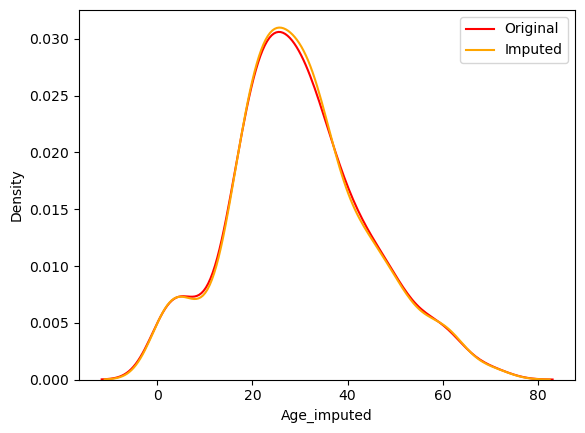

In [14]:
sns.distplot(X_train['Age'], label='Original', kde=True, color ='red', hist=False) 
sns.distplot(X_train['Age_imputed'], label='Imputed' , kde=True, color ='orange' , hist=False )

plt.legend()
plt.show()

In [15]:
print ('Original Variable Variance :', X_train['Age'].var())
print('Variance after random imputation: ', X_train['Age_imputed'].var())

Original Variable Variance : 204.3495133904614
Variance after random imputation:  202.36114858938168


In [16]:
X_train[['Fare', 'Age', 'Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2448.197914,70.719262,52.916827
Age,70.719262,204.349513,204.349513
Age_imputed,52.916827,204.349513,202.361149


<Axes: >

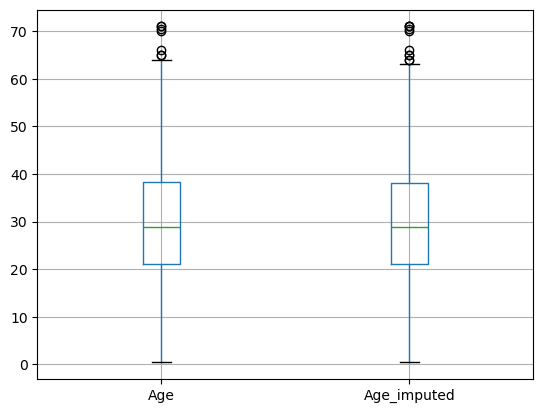

In [17]:
X_train[['Age', 'Age_imputed']].boxplot()

In [18]:
observation = X_train.iloc[0]
sampled_value = X_train['Age'].dropna().sample(1 , random_state=int(observation['Fare']))

In [20]:
data= pd.read_csv(r'D:\STUDY MATERIAL\DATASET\house.csv' , usecols=['GarageQual', 'FireplaceQu', 'SalePrice'])

In [21]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [22]:
data.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [23]:
X=data
y=data['SalePrice']

In [24]:
X_train , X_test, y_train , y_test=train_test_split(X,y,test_size=0.2, random_state=2)

In [25]:
X_train['GarageQual_imputed']=X_train['GarageQual']
X_test['Garage_imputed']=X_train['GarageQual'] 

X_train['FireplaceQu_imputed']=X_train['FireplaceQu']
X_test['FireplaceQu_imputed']=X_train['FireplaceQu']

In [26]:
X_test.head()

,FireplaceQu,GarageQual,SalePrice,Garage_imputed,FireplaceQu_imputed
503,TA,TA,289000,NaN,NaN
101,TA,TA,178000,NaN,NaN
608,Gd,TA,359100,NaN,NaN
1089,Gd,TA,197000,NaN,NaN
819,Gd,TA,224000,NaN,NaN


In [27]:
X_train.loc[X_train['GarageQual_imputed'].isnull() ,'GarageQual_imputed'] = X_train['GarageQual'].dropna().sample(n=X_train['GarageQual_imputed'].isnull().sum() , replace=True).values

X_test['GarageQual_imputed'] = X_test['GarageQual'].copy()

X_test.loc[X_test['GarageQual_imputed'].isnull(), 'GarageQual_imputed']=X_train['GarageQual'].dropna().sample(
        n=X_test['GarageQual_imputed'].isnull().sum(),
    replace=True
).values

In [28]:
temp = pd.concat ([
    X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
    X_train['GarageQual_imputed'].value_counts() / len(X_train)
],
axis=1)
temp.columns = ['GarageQual' , 'imputed']

In [29]:
temp 

,GarageQual,imputed
TA,0.951043,0.949486
Fa,0.037171,0.038527
Gd,0.009973,0.009418
Po,0.000907,0.000856
Ex,0.000907,0.001712


In [30]:
temp =pd.concat([
    X_train['FireplaceQu'].value_counts() /len(X_train['FireplaceQu'].dropna()), 
    X_train['FireplaceQu_imputed'].value_counts() / len(df)
],
  axis =1)
temp.columns= ['Original ', 'imputed']
temp

,Original,imputed
Gd,0.494272,0.338945
TA,0.412439,0.282828
Fa,0.040917,0.028058
Po,0.027823,0.019080
Ex,0.024550,0.016835


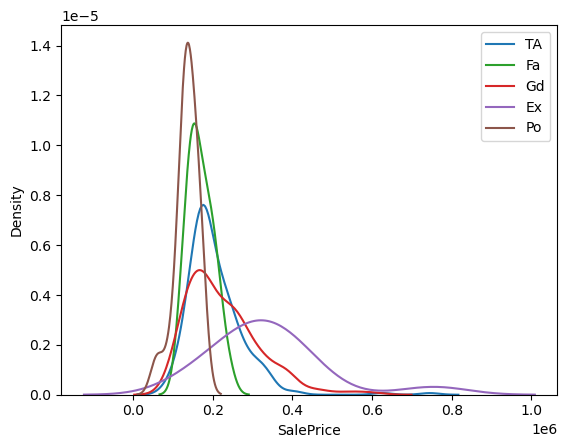

In [31]:
for category in X_train['FireplaceQu'].unique():
    sns.kdeplot(
        X_train[X_train['FireplaceQu'] == category]['SalePrice'], 
        label=category
    )
plt.legend()
plt.show()


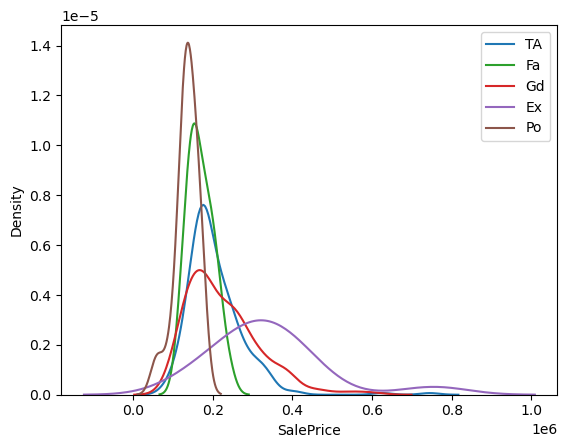

In [32]:
for category in X_train['FireplaceQu_imputed'].unique():
    sns.kdeplot(
        X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'], 
        label=category
    )
plt.legend()
plt.show()
